In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def cv_imread(filePath):
    cv_img=cv2.imdecode(np.fromfile(filePath,dtype=np.uint8),-1)
    ## imdecode读取的是rgb，如果后续需要opencv处理的话，需要转换成bgr，转换后图片颜色会变化
    ##cv_img=cv2.cvtColor(cv_img,cv2.COLOR_RGB2BGR)
    return cv_img

In [3]:
def normalize_(img):
    #分别对每一层进行归一化
    new_img=np.zeros(img.shape)
    new_img[:,:,0]=(img[:,:,0]-np.mean(img[:,:,0]))/np.std(img[:,:,0])
    new_img[:,:,1]=(img[:,:,1]-np.mean(img[:,:,1]))/np.std(img[:,:,1])
    new_img[:,:,2]=(img[:,:,2]-np.mean(img[:,:,2]))/np.std(img[:,:,2])
    return new_img

In [4]:
base_dir='F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片'

base_list=os.listdir(base_dir)
sec_dir=[]
for b in base_list:
    sec_dir.append(base_dir+'/'+ str(b))

In [5]:
sec_dir

['F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/不导电',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/喷流',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/擦花',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/杂色',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/桔皮',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/漆泡',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/漏底',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/脏点',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/角位漏底',
 'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/起坑']

In [6]:
label_dir='F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片'

label_list=os.listdir(label_dir)
label_comdir=[]
for b in base_list:
    label_comdir.append(label_dir+'/'+ str(b))

In [7]:
label_comdir

['F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/不导电',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/喷流',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/擦花',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/杂色',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/桔皮',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/漆泡',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/漏底',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/脏点',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/角位漏底',
 'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/起坑']

In [ ]:
dict_class={'不导电':0,
            '擦花':1,
            '角位漏底':2,
            '桔皮':3,
            '漏底':4,
            '喷流':5, 
            '漆泡':6,
            '起坑':7,
            '杂色':8,
            '脏点':9}

In [10]:
#
def class_npy(cdir,maskdir,re_size=(480,480)):
    img_list=os.listdir(cdir)

In [12]:
cdir=sec_dir[0]
img_list=os.listdir(cdir)

In [26]:
cdir

'F:/lvcai/guangdong_round2_train_20181011/单瑕疵图片/不导电'

In [13]:
img_list#既有JPG 又有 json

['不导电20180830131536对照样本.jpg',
 '不导电20180830131536对照样本.json',
 '不导电20180830131551对照样本.jpg',
 '不导电20180830131551对照样本.json',
 '不导电20180830131628对照样本.jpg',
 '不导电20180830131628对照样本.json',
 '不导电20180830131827对照样本.jpg',
 '不导电20180830131827对照样本.json',
 '不导电20180830134330对照样本.jpg',
 '不导电20180830134330对照样本.json',
 '不导电20180830134402对照样本.jpg',
 '不导电20180830134402对照样本.json',
 '不导电20180830134743对照样本.jpg',
 '不导电20180830134743对照样本.json',
 '不导电20180830135013对照样本.jpg',
 '不导电20180830135013对照样本.json',
 '不导电20180830135838对照样本.jpg',
 '不导电20180830135838对照样本.json',
 '不导电20180830140724对照样本.jpg',
 '不导电20180830140724对照样本.json',
 '不导电20180830140809对照样本.jpg',
 '不导电20180830140809对照样本.json',
 '不导电20180830142508对照样本.jpg',
 '不导电20180830142508对照样本.json',
 '不导电20180830155325对照样本.jpg',
 '不导电20180830155325对照样本.json',
 '不导电20180831100602对照样本.jpg',
 '不导电20180831100602对照样本.json',
 '不导电20180831100625对照样本.jpg',
 '不导电20180831100625对照样本.json',
 '不导电20180831101421对照样本.jpg',
 '不导电20180831101421对照样本.json',
 '不导电20180831101630对照样本.

In [15]:
img_list[0][-3:]

'jpg'

In [14]:
img_length= len(img_list)

In [24]:
width=480 #640
height=480
new_shape=(int(img_length/2),width,height,3)
X_all=np.zeros(new_shape,dtype='float64')  #(个数，长（宽width），宽(高height)，通道)

In [28]:
X_all[0,:,:,:].shape

(480, 480, 3)

In [44]:
#处理JPG文件
for i in range(img_length):
    if img_list[i][-3:]=='jpg':
        #print(img_list[i])
        #print(i)
        img = cv_imread(cdir+'/'+img_list[i])
        img = cv2.resize(img,(width,height))
        newimg=normalize_(img)
        X_all[int(i/2),:,:,:]=newimg  #因为有json文件，所以编号要进行处理

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

In [45]:
X_all[0,:,:,:].shape

(480, 480, 3)

In [53]:
np.save('F:/lvcai/guangdong_round2_train_20181011/squarenpy/testbdd.npy',X_all)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


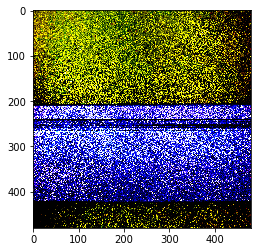

In [46]:
plt.imshow(X_all[0,:,:,:])

In [51]:
#处理mask.npy文件
maskdir=label_comdir[0]

In [52]:
maskdir

'F:/lvcai/guangdong_round2_train_20181011/labelsq/单瑕疵图片/不导电'

In [54]:
mask_list=os.listdir(maskdir)

In [55]:
mask_list

['不导电20180830131536对照样本_label.npy',
 '不导电20180830131551对照样本_label.npy',
 '不导电20180830131628对照样本_label.npy',
 '不导电20180830131827对照样本_label.npy',
 '不导电20180830134330对照样本_label.npy',
 '不导电20180830134402对照样本_label.npy',
 '不导电20180830134743对照样本_label.npy',
 '不导电20180830135013对照样本_label.npy',
 '不导电20180830135838对照样本_label.npy',
 '不导电20180830140724对照样本_label.npy',
 '不导电20180830140809对照样本_label.npy',
 '不导电20180830142508对照样本_label.npy',
 '不导电20180830155325对照样本_label.npy',
 '不导电20180831100602对照样本_label.npy',
 '不导电20180831100625对照样本_label.npy',
 '不导电20180831101421对照样本_label.npy',
 '不导电20180831101630对照样本_label.npy',
 '不导电20180831101642对照样本_label.npy',
 '不导电20180831101753对照样本_label.npy',
 '不导电20180831101841对照样本_label.npy',
 '不导电20180831102055对照样本_label.npy',
 '不导电20180831102726对照样本_label.npy',
 '不导电20180831102759对照样本_label.npy',
 '不导电20180831102813对照样本_label.npy',
 '不导电20180831102827对照样本_label.npy',
 '不导电20180831102843对照样本_label.npy',
 '不导电20180831102911对照样本_label.npy',
 '不导电20180831102927对照样本_labe

In [57]:
length = len(mask_list)

In [59]:
width=480 #640
height=480
new_shape=(int(img_length/2),width,height,10)
Y_all=np.zeros(new_shape,dtype='int8')  #(个数，长（宽width），宽(高height)，通道)


In [60]:
for i in range(length):
    single=np.load(maskdir+'/'+mask_list[i])
    Y_all[i,:,:,:]=single

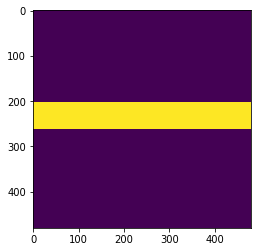

In [62]:
plt.imshow(Y_all[389,:,:,0])

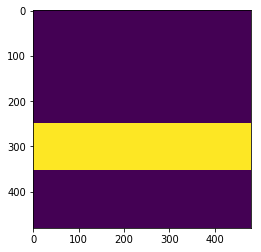

In [63]:
plt.imshow(Y_all[0,:,:,0])

In [64]:
np.save('F:/lvcai/guangdong_round2_train_20181011/squarenpy/testbddlabel.npy',Y_all)

In [ ]:
plt.imshow(Y_all[1,:,:,0])